---
title: Pivot Table Examples
tags: [jupyter]
keywords: pandas
summary: "Pivot table example."
mlType: dataFrame
infoType: pandas
sidebar: pandas_sidebar
permalink: __AutoGenThis__
notebookfilename:  __AutoGenThis__
---

In [1]:
import sys
sys.path.append("../")

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# Padas Options

In [3]:
pd.set_option('max_rows', 8)

# I/O

In [4]:
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

In [6]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


# Main Pivot Table Experiments

## Function of Decade

Lets compare by decade.  To do this we first convert the year to decade. Then create a pivot table for sex.

In [16]:
births['decade'] = 10 * (births.year // 10)

In [19]:
births.pivot_table(values='births',
                  index='decade',
                  columns='gender',
                  aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


<Figure size 1008x432 with 0 Axes>

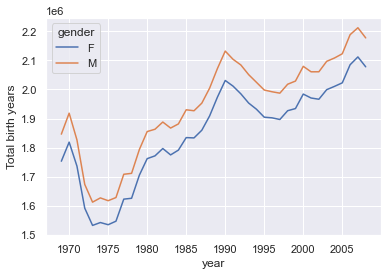

In [26]:
# init the figure
plt.figure(figsize=(14,6))

# use seaborn style intead of matlab
sns.set()

# plot the figure
births.pivot_table(values='births',
                  index='year',
                  columns='gender',
                  aggfunc='sum').plot()

plt.ylabel('Total birth years')

plt.show()

## Cleaning

In [27]:
quartiles = np.quantile(births['births'],[.25,.50,.75])
mu= quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [28]:
cleanBirths = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [29]:
# set 'day' column to integer; it originally was a string due to nulls
cleanBirths['day'] = cleanBirths['day'].astype(int)

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
# create a datetime index from the year, month, day
cleanBirths.index = pd.to_datetime(10000 * cleanBirths.year +
                              100 * cleanBirths.month +
                              cleanBirths.day, format='%Y%m%d')

cleanBirths['dayofweek'] = cleanBirths.index.dayofweek

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<Figure size 1008x432 with 0 Axes>

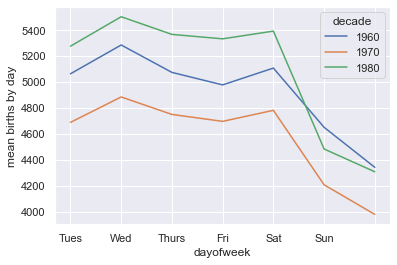

In [31]:
plt.figure(figsize=(14,6))

sns.set()

cleanBirths.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()

plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

plt.ylabel('mean births by day')

plt.show()


## Function of day of the year

In [32]:
cleanBirths.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


Lets create a pivot table with multi-indexing of month and day

In [33]:
birthByDate = cleanBirths.pivot_table(values='births',
                                     index=['month','day'])

birthByDate.head()

births
month day          
1     1    4009.225
      2    4247.400
      3    4500.900
      4    4571.350
      5    4603.625

In [36]:
birthByDate.index = [pd.datetime(2012, month, day)
                        for (month, day) in birthByDate.index]
birthByDate.head()

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


## Plotting by day

<Figure size 864x288 with 0 Axes>

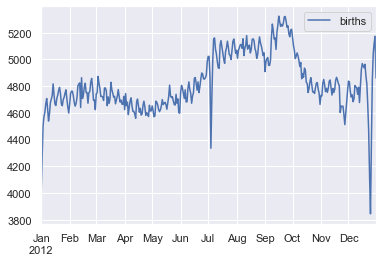

In [42]:
plt.figure(figsize=(12,4))

birthByDate.plot()

plt.show()